# import

In [1]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import re
# import time
from datetime import datetime
# from urllib.request import urlopen


# from bs4 import BeautifulSoup
# from requests import get


In [2]:
import helpers

# scrape all pages

In [3]:
# def scrape_housing_data(url = "https://sfbay.craigslist.org/search/apa?availabilityMode=0", studiobedrooms = 1.0):
    
#     """
#     Args:
#         url: url of the webpage to scrape. Defaults to bay area craigslist.
        
#     Returns:
#         dataframe with (almost) raw scraped data (with minor cleaning)
    
#     """
    
#     html = urlopen(url)
#     soup = BeautifulSoup(html,'html')
    

#     # define ranges
#     rangefrom=int(soup.find(class_="rangeFrom").text)  # starting index for listings
#     rangeto=int(soup.find(class_="rangeTo").text)  # ending index for listings
#     perpage = rangeto-rangefrom+1  # listings per page
#     totalcount = int(soup.find(class_="totalcount").text)  # total number of listings
    
    
    
#     #initialize lists of info:
#     links=[]  # url links for each listing
#     descs=[]  # description for each listing
#     prices=[]  # price for each listing
#     sqfeets=[]  # square feet for each listing
#     bedrooms = []  # number of bedrooms for each listing
#     hood=[]  # neighborhood for each listing

    
#     #for each page, make a soup, and for each listing in that soup, append to each info list. 
#     for i in range(0,totalcount,perpage):
#         url = "https://sfbay.craigslist.org/search/apa?availabilityMode=0&s="+str(i)


#         response = get(url)
#         soup = BeautifulSoup(response.text,'html')
#         resultrows = soup.find_all(class_="result-row");

#         ###
#         for row in resultrows:

#             #hyperlink:
#             linki = row.find(class_='result-title hdrlnk')['href']
#             links.append(linki)

#             #description (or title) of listing:
#             description = row.find(class_='result-title').text
#             descs.append(description)

#             #price:
#             try:
#                 price=float(  re.compile('[\d]+').search( row.find(class_='result-price').text   ).group()   )
#                 prices.append(price)
#             except:
#                 prices.append(np.NaN)

#             #number of bedrooms and square footage:
#             try:
#                 housinginfo = row.find(class_='housing').text
#                 #bedrooms:
#                 try: #check whether # of bedrooms is given in the "housing" class:
#                     br = float(re.compile('\d').search(  re.compile('\dbr').search(housinginfo).group()  ).group()  ) #this mess pulls out number of bedrooms
#                 except AttributeError: #if not, try to find bedroom number in description:
#                     try: 
#                         br=re.compile('\d').search(re.compile('(\dbr|\d-br|\d\sbr|\dbdr|\d-bdr|\d\sbedroom|\d-bedroom)').search(description.lower()).group()).group()

#                     except: #or maybe the description says it's a studio:
#                         stud=re.compile('studio').search(description.lower())
#                         if stud is not None:
#                             br = studiobedrooms
#                         else:
#                             br=np.NaN
#                 #square footage:
#                 try: #check whether square footage is given in "housing" class:
#                     sqfeet = float(re.compile('[\d]+').search( re.compile('[\d]+ft2').search(housinginfo).group() ).group()   )
#                     sqfeets.append(sqfeet)
#                 except AttributeError: #if not, mark "nan" and move on.
#                     sqfeets.append(np.NaN)
#             except AttributeError: #in case 'housing' class doesn't exist for the listing:
#                 sqfeets.append(np.NaN) #give up on square footage
#                 #
#                 try: #try to find number of bedrooms in description:
#                     br=re.compile('\d').search(re.compile('(\dbr|\d-br|\d\sbr|\dbdr|\d-bdr|\d\sbedroom|\d-bedroom)').search(description.lower()).group()).group()
#                 except: #if no appearance of "br" in description, look for "studio":
#                     stud=re.compile('studio').search(description.lower())
#                     if stud is not None:
#                         br = studiobedrooms
#                     else:
#                         br=np.NaN
#             finally: #br has now been defined, even if as "nan"
#                 bedrooms.append(float(br))


#             #neighborhood
#             try:
#                 nh = re.compile('[^)^(]+').search(  row.find(class_='result-hood').text.strip().lower()  ).group()        
#                 hood.append(nh)
#             except:
#                 hood.append(np.NaN)



#         time.sleep(3) #take a break before scraping the next page
        
#     raw_scraped_data = pd.DataFrame({'url': links, 'description': descs, 'price': prices, 'square_feet': sqfeets, 'bedrooms': bedrooms, 'neighborhood': hood})
#     return raw_scraped_data


## To scrape fresh data

In [4]:
# raw_scraped_data = helpers.scrape_housing_data()

In [5]:
# raw_scraped_data.head()

In [6]:
# raw_scraped_data.to_csv('raw_scraped_data.csv', index=0)

## To import already scraped data:

In [7]:
raw_scraped_data = pd.read_csv('raw_scraped_data.csv')
raw_scraped_data.head()

,url,description,price,square_feet,bedrooms,neighborhood
0,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,QUIET NORTH BEACH STUDIO W/ PRIVATE DECK & GARDEN,2200.0,NaN,1.0,north beach / telegraph hill
1,https://sfbay.craigslist.org/nby/apa/d/petalum...,Closed to all YOur Need @ WoodCreek Apartments!!,2199.0,700.0,2.0,petaluma
2,https://sfbay.craigslist.org/sby/apa/d/cuperti...,"Private Balconies, Call for Details, Stylish F...",4762.0,1291.0,2.0,cupertino
3,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,"When Minutes Matter, Live Where You Work and Play",3790.0,728.0,1.0,soma / south beach
4,https://sfbay.craigslist.org/sby/apa/d/milpita...,"3 Bed - 3 Bath, Pickle Ball, Mountain view-Up ...",5810.0,1753.0,3.0,milpitas


# cleaning

## given the dataframe, produce a cleaned list of the represented neighborhoods 

In [8]:
# def get_cleaned_neighborhoods(scraped_data):
    
#     """
#     Produce a list from scraped_data['neighborhood'] with no null values, no street addresses, and no slashes, e.g. separate "richmond/antioch" to "richmond", "antioch"
    
#     Args:
#         scraped_data: dataframe with a column 'neighborhood' containing strings and np.nan
        
#     Returns:
#         list of strings
    
#     """
    
#     raw_nh_list = [nh for nh in list(set(scraped_data['neighborhood'].dropna())) if re.compile('[\d]').search(nh) is None]
    
#     nested_nh_list = [nh.split('/') for nh in raw_nh_list]  # split on '/'
#     ## also split on ',' ?
#     nh_list = [x.strip().lower() for nh in nested_nh_list for x in nh]  # flatten the list
#     nh_list = [x for x in nh_list if re.compile('[\d]').search(x) is None]  # lose the elements containing digits
#     nh_list = [x for x in nh_list if x != 'downtown'] # remove 'downtown'
#     return nh_list
    
    

# def extract_neighborhood(description, neighborhoods_list):
    
#     """
#     Search for any of the elements of neighborhoods_list in description.
    
#     Args:
#         description: text string
#         neighborhoods_list: list of strings
        
#     Returns:
#         the first element of neighborhoods_list that appears in desctription.
    
#     """
    
#     description = description.lower()
#     neighborhoods_list = [x.lower() for x in neighborhoods_list]
    
#     orhoods = r'(\b'+(r'\b|\b'.join(neighborhoods_list))+r'\b)'
    
#     nh_in_description = re.compile(orhoods).search(description)
    
#     if nh_in_description is not None:
#         nh = nh_in_description.group()
# #         print(f"found {nh} in description {description}")
#     else:
#         nh = np.nan
        
#     return nh
    

# def fill_neighborhood_from_description(scraped_data):
    
#     """
#     Operates on the full dataframe.
#     If missing data in 'neighborhood' column of scraped_data, check for 'neighborhood' from any row in 'description' column.
    
#     Args:
#         scraped_data: dataframe, must have columns ['description', 'neighborhood']
        
#     Returns:
#         copy of scraped_data with missing 'neighborhood' values filled using description, when possible.
    
#     functional dependencies:
#         get_cleaned_neighborhoods
#         extract_neighborhood
#     """
    
#     df = scraped_data.copy()
    
#     neighborhoods_list = get_cleaned_neighborhoods(scraped_data)
# #     neighborhoods_list = list(set(scraped_data['neighborhood'].dropna()))

    
#     df['neighborhood'] = df.apply(lambda row: extract_neighborhood(row['description'], neighborhoods_list) if str(row['neighborhood'])=='nan' else row['neighborhood'], axis = 1)

        
#     return df

In [9]:
# def street_address_to_neighborhood(possible_street_address, neighborhoods_list):
#     """
#     If possible_street_address is not contained in neighborhoods_list, return whichever part of it is (if any).
#     Args:
#         possble_street_address: string, possibly containing digits
#         neighborhoods_list
#     Returns:
#         string
        
#     """
# #     possible_street_address = possible_street_address.lower()
#     neighborhoods_list = [x.lower() for x in neighborhoods_list]
    
#     orhoods = r'(\b'+(r'\b|\b'.join(neighborhoods_list))+r'\b)'

    
#     if (possible_street_address not in neighborhoods_list) and (str(possible_street_address) != 'nan'):
        
#         neighborhood_within_address = re.compile(orhoods).findall(possible_street_address.lower())
#         if neighborhood_within_address != []:
            
#             return('/'.join(neighborhood_within_address))
        
#         else:
#             return np.nan
        
#     else:
#         return possible_street_address
        


In [10]:
# def convert_street_addresses(scraped_data):
    
#     """
#     Operates on the full dataframe.
    
#     If scraped_data['neighborhood'] is not in the cleaned list of neighborhoods (e.g. because it has digits in it),
#     check whether it contains any of the cleaned neighborhoods. If so, replace with that. If not, replace with np.nan.
    
#     Args:
#         scraped_data: dataframe with column ['neighborhood']
        
#     Returns:
#         copy of scraped_data with 'neighborhood' replaced by np.nan if it contained digits
    
#     """
#     clean_nh_list = get_cleaned_neighborhoods(scraped_data)
    
#     df = scraped_data.copy()
    
#     df['neighborhood'] = df['neighborhood'].apply(lambda nh: street_address_to_neighborhood(nh, clean_nh_list))
    
#     return df

# use scraped info about sf and oakland neighborhoods to lump:

As pulled from Craigslist, "San Francisco" is broken down into many neighborhoods. I would like to lump these all into "san francisco", so I can have enough samples per neighborhood to do statistics.

I'll try scraping neighborhood names from Wikipedia:

In [11]:



# from bs4 import BeautifulSoup
# from urllib.request import urlopen
# import re

# def scrape_neighborhoods_from_wikipedia(city):
    
#     """
#     Args:
#         city: name of the city
#     Returns:
#         list of neighborhoods in the given city
#     """
    
#     url = "https://en.wikipedia.org/wiki/List_of_neighborhoods_in_" + '_'.join([x.capitalize() for x in city.split(' ')])

#     html = urlopen(url)

#     soup = BeautifulSoup(html,'html')

#     allsections=soup.select('.toclevel-1')

#     hoods=[];
#     for sec in allsections:
#         hoods.append(re.compile("[a-z\s/'-]+").search(sec.text.lower()).group().strip())
    
#     hoods = [nh for nh in hoods if nh.lower() not in ['see also','references', 'external links']]
    
#     return hoods

In [12]:
# scrape_neighborhoods_from_wikipedia('san francisco')

In [13]:
# urlsfnh="https://en.wikipedia.org/wiki/List_of_neighborhoods_in_San_Francisco"

# htmlsfnh=urlopen(urlsfnh)

# soupsfnh = BeautifulSoup(htmlsfnh,'html')

# allsections=soupsfnh.select('.toclevel-1')

# sfhoods=[];
# for sec in allsections:
#     sfhoods.append(re.compile("[a-z\s/'-]+").search(sec.text.lower()).group().strip())
    
# sfhoods = [nh for nh in sfhoods if nh.lower() not in ['see also','references', 'external links']]

In [14]:
# urloak="https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Oakland,_California"

# htmloak=urlopen(urloak)

# soupoak = BeautifulSoup(htmloak,'html')

# allsections=soupoak.select('.toclevel-1')

# oakhoods=[];
# for sec in allsections:
#     oakhoods.append(re.compile("[a-z\s/'-]+").search(sec.text.lower()).group().strip())
    
# oakhoods=[nh for nh in oakhoods if nh.lower() not in ['see also','references', 'external links']]

In [15]:
# sfhoods

In [16]:
# oakhoods

In [17]:
## loop through dataframe neighborhoods, and check whether 

In [18]:
# def lump_neighborhoods_function(nh):
    
#     """
#     Args:
#         nh: string or np.nan representing the name of a neighborhood.
#     Returns: 'san francisco' or 'oakland' as appropriate if 
    
#     sfhoods and oakhoods must be externally defined.
    
#     """
#     if nh in sfhoods:
#         new_nh = 'san francisco'
    
#     elif nh in oakhoods:
#         new_nh = 'oakland'
    
#     elif str(nh)!='nan':
#         if re.compile('san jose').search(nh) is not None:
#             new_nh = 'san jose'
#         else:
#             new_nh = nh
    
#     else:
#         new_nh = nh
        
#     return new_nh
    
    
# ## other cleaning? e.g. remove ", ca" from ends of neighborhoods


# def chop_endings_function(thestring, list_of_endings):
#     """
#     Args:
#         thestring: string to chop
#         list_of_endings: list of endings to chop off of thestring
#     Returns:
#         thestring with ending chopped off, if it was there to begin with.
#     """
#     if type(thestring)==str:
#         for ending in list_of_endings[::-1]:
#             if thestring.endswith(ending):
#                 thestring = thestring[:-len(ending)].strip()

#     return thestring

In [19]:
# def lump_and_chop_neighborhoods(data):
#     """
#     Args:
#         data: dataframe with columns 
#     Returns:
        
#     """
    
#     data_copy = data.copy()
    
#     data_copy['neighborhood'] = data_copy['neighborhood'].apply(lump_neighborhoods_function)
#     data_copy['neighborhood'] = data_copy['neighborhood'].apply(lambda nh: chop_endings_function(nh, ['ca', ', ca', ',ca']))
    
#     return data_copy

# put it together to clean the data

In [20]:
# def all_cleaning(raw_data):
    
#     """
#     Args:
#         raw_data: includes columns ['description', 'price', 'neighborhood']
#     Returns:
#         dataframe with cleaned neighborhood information, no duplicates, and no rows with missing data.
#     """
    
#     out_df = raw_data.pipe(convert_street_addresses).pipe(fill_neighborhood_from_description).pipe(lump_and_chop_neighborhoods)
#     out_df = out_df.drop_duplicates(subset = ['description', 'price'])
#     out_df = out_df[['url', 'description', 'neighborhood', 'price', 'bedrooms']]
#     out_df = out_df.dropna()
    
#     #discard listings with truly enormous rent (probably actually for sale)
#     out_df = out_df.loc[out_df['price']<1e4]
    
#     #not using area as a feature now
#     #dfclean['1000sqfeet']=dfclean['sq. feet']/1000  #normalize so all features are order 1 (no area is in 1000s of square feet)
#     #no need to rescale price when only using one feature per neighborhood
#     #dfclean['pricek']=dfclean['price']/1000 #normalize so all features are order 1 (price is in thousands of dollars)

    
#     return out_df
    
# def filter_to_popular_neighborhoods(df, min_count = 50):
    
#     """
#     narrow down neighborhoods considered. there are too many, with not enough samples for most.
#     Args:
#         df: cleaned dataframe with columns ['description', 'neighborhood']
#         min_count: minimum number of listings a neighborhood must have to be counted. defaults to 50.
#     Returns:
#         rows of the input dataframe df where neighborhood is one with at least min_count listings.
#     """
    
    
#     byhood=df.groupby(by='neighborhood').count()['description'].sort_values(ascending=False)
#     maxhoods=list(byhood[byhood >= 50].index) #pick off only neighborhoods with >50 listings
    
#     df_maxhoods = df.copy()
#     df_maxhoods['maxhood'] = df_maxhoods['neighborhood'].apply(lambda x: 1 if x in maxhoods else 0)
#     df_maxhoods = df_maxhoods.loc[df_maxhoods['maxhood'] == 1]
    
#     return df_maxhoods.drop(columns=['maxhood'])
    

    

In [23]:
cleaned_data = raw_scraped_data.pipe(helpers.all_cleaning).pipe(helpers.filter_to_popular_neighborhoods)


In [24]:
len(cleaned_data)

1265

In [25]:
# save cleaned data to .csv
cleaned_data.to_csv('craigslist_bay_area_rentals.csv')

# transform feaures

Very simple: just engineer one feature, price per room.

In [552]:
def transform_features(cleaned_data):
    
    """
    Args:
        cleaned_data: dataframe with columns ['price', 'bedrooms']
    Returns:
        input dataframe with an additional column, price per bedroom
    """
    
    transformed_data = cleaned_data.copy()
    transformed_data['price_per_room'] = transformed_data['price']/transformed_data['bedrooms']
    
    return transformed_data

In [553]:
transformed_data = transform_features(cleaned_data)

transformed_data.head()

,url,description,neighborhood,price,bedrooms,price_per_room
0,https://sfbay.craigslist.org/sby/apa/d/san-jos...,1 Bedroom Upstairs,san jose,1650.0,1.0,1650.0
2,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2BR Sunnyside Home in Great Location!,san francisco,3950.0,2.0,1975.0
3,https://sfbay.craigslist.org/sby/apa/d/san-jos...,"WOW kitchen, Open concept 1BR apt, Very spaci...",san jose,2600.0,1.0,2600.0
7,https://sfbay.craigslist.org/eby/apa/d/fremont...,Beautiful Home in Fremont Mission San Jose Dis...,fremont/union city/newark,4500.0,5.0,900.0
9,https://sfbay.craigslist.org/eby/apa/d/concord...,Cozy Studio Apartment next to Downtown Concord...,concord/pleasant hill/martinez,1595.0,1.0,1595.0


In [555]:
transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1218 entries, 0 to 2998
Data columns (total 6 columns):
url               1218 non-null object
description       1218 non-null object
neighborhood      1218 non-null object
price             1218 non-null float64
bedrooms          1218 non-null float64
price_per_room    1218 non-null float64
dtypes: float64(3), object(3)
memory usage: 66.6+ KB


# visualize

In [557]:
max_neighborhoods_set = list(set(cleaned_data['neighborhood']))
max_neighborhoods_set

['fremont/union city/newark',
 'san francisco',
 'mountain view',
 'cupertino',
 'soma/south beach',
 'san jose',
 'santa clara',
 'dublin/pleasanton/livermore',
 'santa rosa',
 'concord/pleasant hill/martinez',
 'sunnyvale']

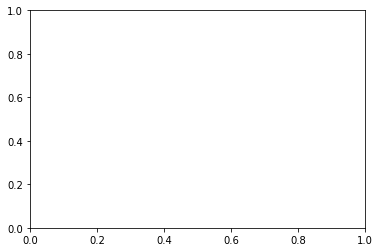

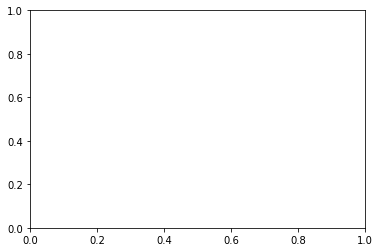

In [709]:
ax = plt.subplots()[1];
fig = plt.subplots()[0]

In [710]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [711]:
ax.hist([1,1,2,3,4,4,4,5,6,6,6])

(array([2., 0., 1., 0., 1., 0., 3., 0., 1., 3.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

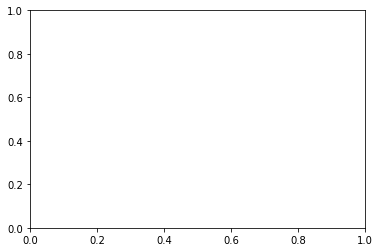

In [712]:
fig

In [864]:
def plot_price_distr(transformed_data, neighborhoods = list(set(transformed_data['neighborhood']))):
    """
    Produce a histogram of the prices for the given neighborhood, along with the log normal of the same mean and standard deviation.
    Args:
        transformed_data: dataframe with columns ['neighborhood', 'price_per_room']
        neighborhoods: a list containing any of the values in the 'neighborhood' column of transformed_data
    Returns: a figure
    """
    
    fig, axes = plt.subplots(len(neighborhoods), figsize=(10,50), sharex=True)
    plt.subplots_adjust(hspace = 1)

    
    for i, neighborhood in enumerate(neighborhoods):
        
        if type(axes) == np.ndarray:
            axi = axes[i]
        else:
            axi = axes
        
        # check neighborhood is represented in transformed_data:
        if neighborhood not in list(set(transformed_data['neighborhood'])):
            print(f"{neighborhood} not found as a value in the 'neighborhood' column of the given dataframe.")
            return None

        else:

            nh_df = transformed_data.loc[transformed_data['neighborhood'] == neighborhood]

            nh_prices = nh_df['price_per_room'].values

            nh_prices_ln = np.log([p for p in nh_prices if p > 0])  # exclude prices of 0
            mu_ln = np.mean(nh_prices_ln)
            std_ln = np.std(nh_prices_ln)


            axi.hist(nh_prices, bins = 10, density = True);
            Y = np.exp(np.arange(0, np.log(transformed_data['price_per_room'].max()), .01))
            Ydistr = (1/((2*np.pi)**.5*std_ln*Y))*np.array( np.exp(-(np.log(Y) - mu_ln)**2/(2*std_ln**2)) ) 
            axi.plot( Y, Ydistr  );
            
            axi.set_title(neighborhood);
            
#     return fig


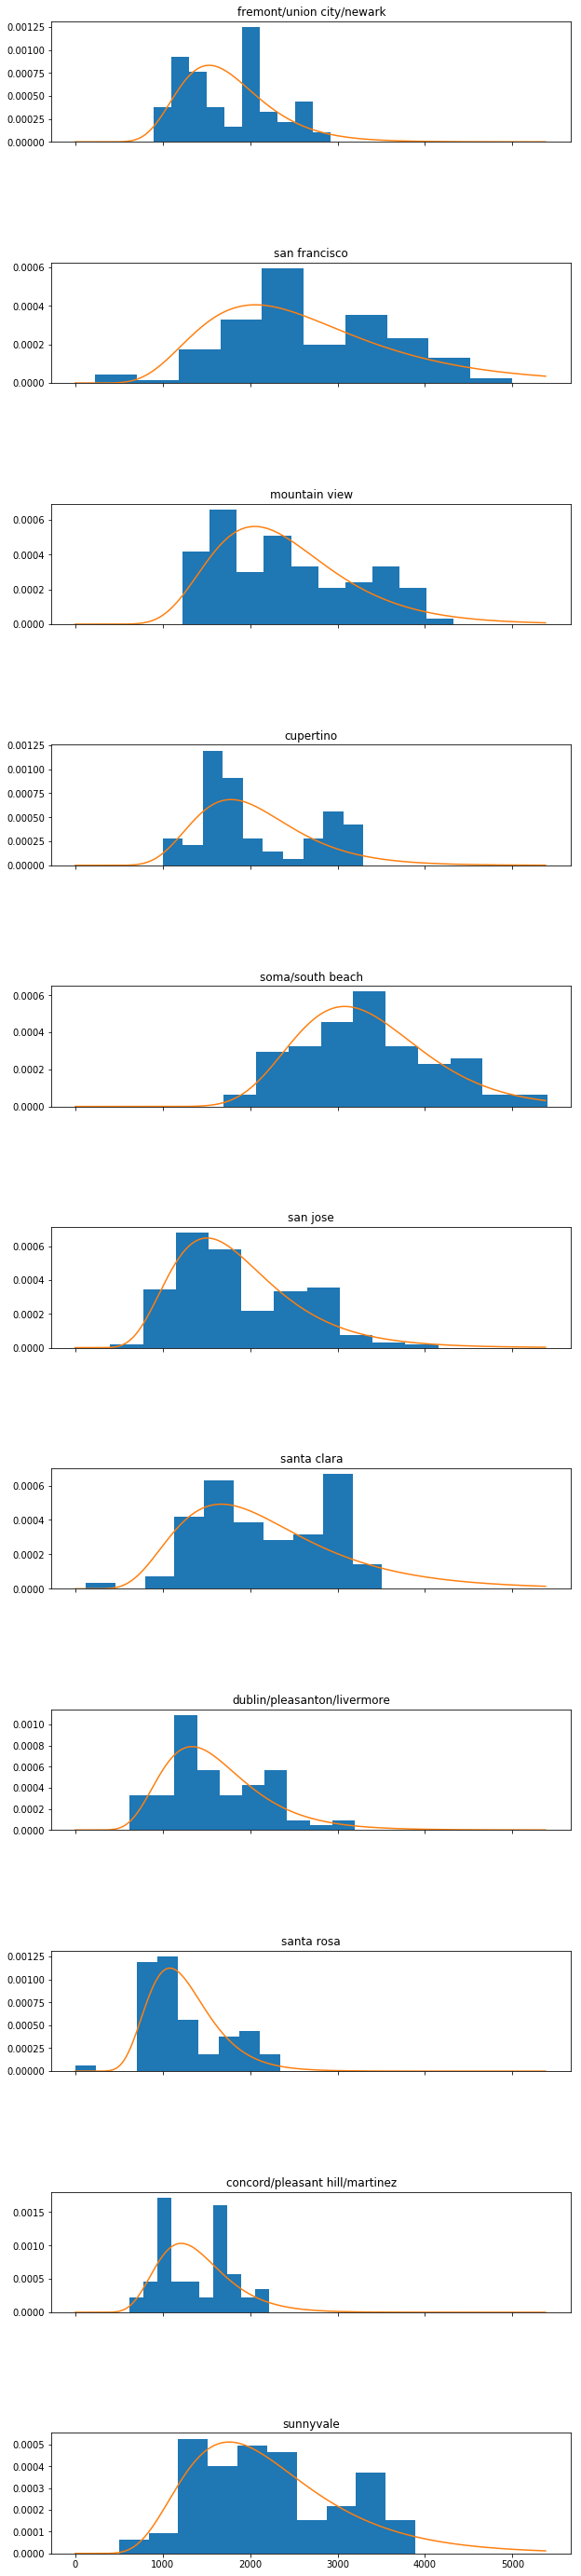

In [865]:
plot_price_distr(transformed_data)#, neighborhoods = ['santa rosa'])

# detect outliers using log normal distribution

In [804]:
def get_outliers(transformed_data, neighborhoods = list(set(transformed_data['neighborhood'])), z = 2.5):
    """
    Detect listings in the dataframe transformed_data with anomologously low price per room.
    Args:
        transformed_data: dataframe with columns ['neighborhood', 'price_per_room']
        neighborhoods: a list containing any of the values in the 'neighborhood' column of transformed_data
        z: largest allowed z-score of a non-outlier. Defaults to 2.5.
        
    Returns: rows of transformed_data for the given neighborhoods with anomalously low prices per room.
    """
    
#     fig, axes = plt.subplots(len(neighborhoods))
#     plt.subplots_adjust(hspace = 1)

    low_outliers_df_all_neighborhoods = pd.DataFrame(columns = transformed_data.columns)
    
    for i, neighborhood in enumerate(neighborhoods):
        
#         if type(axes) == np.ndarray:
#             axi = axes[i]
#         else:
#             axi = axes
        
        # check neighborhood is represented in transformed_data:
        if neighborhood not in list(set(transformed_data['neighborhood'])):
            print(f"{neighborhood} not found as a value in the 'neighborhood' column of the given dataframe.")
            low_outliers_df = None

        else:

            nh_df = transformed_data.loc[transformed_data['neighborhood'] == neighborhood]

            nh_prices = nh_df['price_per_room'].values

            nh_prices_ln = np.log([p for p in nh_prices if p > 0])  # exclude prices of 0
            mu_ln = np.mean(nh_prices_ln)
            std_ln = np.std(nh_prices_ln)
            
            # Filter dataframe
            lowest_non_outlier_price = np.exp(mu_ln - z*std_ln)
            low_outliers_df = nh_df.loc[nh_df['price_per_room'] < lowest_non_outlier_price]


#             # Plotting
#             axi.hist(nh_prices, bins = 10, density = True);
#             Y = np.exp(np.arange(0,10,.01))
#             Ydistr = (1/((2*np.pi)**.5*std_ln*Y))*np.array( np.exp(-(np.log(Y) - mu_ln)**2/(2*std_ln**2)) ) 
#             axi.plot( Y, Ydistr  );
#             axi.set_title(neighborhood);

        low_outliers_df_all_neighborhoods = pd.concat([low_outliers_df_all_neighborhoods, low_outliers_df], axis = 0)
            
            
    return low_outliers_df_all_neighborhoods
            
            
            


In [810]:
low_outliers_df = get_outliers(transformed_data)

In [840]:
from IPython.core.display import display, HTML

# display a useful link to the listings marked as low-price outliers:
def display_link(row):
    
    link = display(HTML(f"<a href={row['url']} target='_blank'> ${np.round(row['price_per_room'])} per room in a {row['neighborhood'].capitalize()} {row['bedrooms']}-bedroom. </a>"))
    
    return link
    
for row in [low_outliers_df.iloc[i] for i in range(len(low_outliers_df))]:
    display_link(row)



# TO DO:

1. Sometimes this misrepresents rent per room, e.g. if someone is renting out just 1 room in a 2-bedroom, and has listed rent for just the 1 room, but has posted the listing as a "2-bedroom". Can I find a way to correct this error by looking for particular words in the description/title?
e.g. try to clean "bedrooms" data by checking description for "room available in". if it's there, probably should set "becrooms" = 1.0.
2. Many of the price distributions look kinda bimodal. Should explore this and consider using a different distribution with which to define outliers.

# predictions

In [ ]:
#train for anomaly detection and make predictions


# #compute the mean
# mu = train[['bedrooms','1000sqfeet', 'pricek']].mean().values
# #mu = np.array(np.mean(train)[['bedrooms','1000sqfeet','pricek']])
# xminusmu = np.array(train[['bedrooms','1000sqfeet', 'pricek']]-mu)

# #compute covariance matrix
# m=xminusmu.shape[0]
# Sigi=0;
# for i in range(0,m):
#     Sigi=Sigi+np.outer(xminusmu[i], (xminusmu[i]).T)
# Sig=(1/m)*Sigi
# detSig = np.linalg.det(Sig)

# Siginv = np.linalg.inv(Sig)
# n=len(mu)
# def p(x):
#     #p takes x in [bedrooms, square feet, dollars]
#     y=np.array([x[0],x[1]/1000,x[2]/1000]) #convert to 1000s of sq feet, 1000s of dollars
#     exp=np.e**(-.5*np.dot(y-mu,np.dot(Siginv,y-mu)))
#     return(exp/( (2*np.pi)**(n/2)*(detSig**(1/2)) ))


def multigauss(X,mu,Sig):  #input X is m by n (must be in the form of a 2-d array). inputs (X, mu, Sig) should be in 1000sqfeet, 1000$.
        #if mu[1]>X[0,1]*10 or mu[1]<X[0,1]/10:
        #    print('Make sure mu and X are in the same units.')
        n = X.shape[1];
        m = X.shape[0];
        Xminusmu = X-mu
        pi = np.pi
        det = np.linalg.det(Sig)
        inv = np.linalg.inv(Sig)
        exponent=-.5*np.reshape([np.dot( (X[i,:]-mu),  np.dot(inv,(X[i,:]-mu).T)) for i in range(0,m)],(m,1))
        return np.reshape(((2*pi)**(-.5*n))*(det**-.5)*np.exp(exponent),(m,))
    
    
#CHANGE FEATURES HERE 
featureset = ['bedrooms','pricek'];
n = len(featureset)


#fit mu, Sig for each neighborhood separately
nhmu = np.zeros((len(maxhoods),n))
nhSig = np.zeros((len(maxhoods),n,n))
for i,nh in enumerate(maxhoods):
    if type(nh)==str:
        #print(nh)
        dfnh = train.loc[train['neighborhood']==nh]
        if len(dfnh) is not 0:
            Xtrain = np.array(dfnh[featureset])
            m = Xtrain.shape[0]
            mu = np.mean(Xtrain,0)
            Xminusmu=Xtrain-mu
            Sig=(1/m)*np.dot(Xminusmu.T,Xminusmu)
            nhmu[i] = mu
            nhSig[i] = Sig
        else:
            nhmu[i]=np.nan
            nhSig[i]=np.nan
    else:
        nhmu[i]=np.nan
        nhSig[i]=np.nan
    

    
    
    


In [ ]:
#e.g. mu and sigma for sunnyvale:
svmu=nhmu[maxhoods.index('sunnyvale')]
svSig=nhSig[maxhoods.index('sunnyvale')]

def svp(X):
    return multigauss(X,svmu,svSig)

svtest = test.loc[test['neighborhood']=='sunnyvale'][:]


svXtest=svtest[featureset].values


svtest['probability'] = svp(svXtest)
svtest[['description']+featureset+['probability']].sort_values(by='probability')


## dont' know why this is not normalized how I expect --- come back to this later

In [ ]:
brrange = np.arange(min(dfsv['bedrooms']),max(dfsv['bedrooms']+1))
pprange = np.arange(min(dfsv['pricek']),max(dfsv['pricek']+1),.1)

plt.hist(dfsv['pricek'])
plt.plot(pprange,[len(dfsv['pricek'])*np.sum([multigauss(np.array([[br,pp]]),svmu,svSig) for br in brrange]) for pp in pprange])


In [ ]:
#this seems fine:

plt.hist(dfsv.loc[dfsv['bedrooms']==1]['pricek'])
plt.plot(pprange,[len(dfsv.loc[dfsv['bedrooms']==1])*multigauss(np.array([[1,pp]]),svmu,svSig) for pp in pprange])


In [ ]:
dfsv = train.loc[train['neighborhood']=='sunnyvale']

pprange = np.arange(0,6,.1);
plt.hist(dfsv['price'])
plt.plot(1000*pprange,np.array([np.sum([svp(np.array([[br,pp]])) for br in range(1,4)]) for pp in pprange]))
plt.xlabel('rent ($)')
plt.title('price distribution for all homes in sunnyvale (training set)');




Expected price given bedrooms and square footage: (want to use this to pick only anomalies where price is lower than expected)

In [ ]:
XY[:,0]

In [ ]:
X = [0,0,0,1,1,1,1,2,3];
Y = [0,1,1,0,2,2,2,3,10];

XY = np.array([X,Y]).T



def gauss(x):
    xmu=np.mean(X);
    xsig=np.std(X);
    return((1/(((2*np.pi)**.5)*xsig))*np.exp(-(x-xmu)**2/(2*xsig**2)))

muXY=np.mean(XY,axis=0)



m=len(X);
SigXY=(1/m)*np.dot((XY-muXY).T,XY-muXY)

def multigaussXY(x,y):
    return multigauss(np.array([[x,y]]),muXY,SigXY)

xrange = np.arange(min(X),max(X)+1);
yrange = np.arange(min(Y),max(Y)+1);

plt.hist(Y)
plt.plot(yrange, [len(XY)*np.sum([multigaussXY(x, y) for x in xrange]) for y in yrange] )

In [ ]:
brrange=list(set(dfsv['bedrooms']));
print(brrange)
.1*np.sum([np.sum([svp(np.array([[br,pp]])) for br in brrange]) for pp in pprange])

(or see below for the quick and dirty method of finding expected price)

In [ ]:
bdrs = 1;
ksqfeet = 1;

pricerange = np.arange(0,50,.1);
probprice=[p(np.array([[bdrs, ksqfeet, kdollars]]), mu, Sig) for kdollars in pricerange]
maxid = np.argmax(probprice)


pricerange[maxid]*1000

Now define function using this to say whether a given price is cheap:

In [ ]:
def isitcheap(X,mu,Sig):
    m=X.shape[0]
    n=X.shape[1]
    
    br = X[:,0]
    sqft = X[:,1]
    price = X[:,2]
    
    dz = 1;
    zmax = 100;
    pricerange = np.arange(0,zmax,dz);
    
    norm = np.zeros(m)
    exp_price = np.zeros(m)
    
    for i in range(0,m):
        norm[i] = dz*np.sum([p(np.array([[br[i],sqft[i],z]]),mu,Sig) for z in pricerange]);
        exp_price[i] = dz*np.sum([z*p(np.array([[br[i],sqft[i],z]]),mu,Sig) for z in pricerange])/norm[i];
    
    return price<exp_price
#returns "True" if price is lower than expected given br and sqft

In [ ]:
#define expected price seprately
def exp_price(br,sqft,mu,Sig):
    norm = dz*np.sum([p(np.array([[br,sqft,z]]),mu,Sig) for z in pricerange]);
    exp_price = dz*np.sum([z*p(np.array([[br,sqft,z]]),mu,Sig) for z in pricerange])/norm;
    return exp_price

In [ ]:
exp_price(4,1.15,mu,Sig)*1000

### Define probability density for price, given fixed number of bedrooms and square footage.

In [ ]:
br = 1;
sqft = 1;

dz=.1;
zmax = 8;
    
def pz(x0,y0,z):

    norm=dz*np.sum([p(np.array([[1,1,z]]),mu,Sig) for z in np.arange(0,zmax,dz)]);
    return p(np.array([[x0,y0,z]]),mu,Sig)/norm

#plt.plot(pricerange,[pz(1,1,z) for z in pricerange])

pricerange=np.arange(0,zmax,dz)
pzrange=np.reshape([pz(1,1,z) for z in pricerange],(len(pricerange),));

plt.plot(pricerange*1000,pzrange)
plt.xlabel('Price ($)')
plt.title(f'(Normalized) distribution for price, for {br}-bedroom, {sqft*1000} sq-foot homes')

In [ ]:
start = time.time()
dz*np.sum([pz(br,sqft,z)*z for z in pricerange])
end = time.time()
end-start

This can the be used to get expected price given bedrooms and area.

In [ ]:
smallp=(p(Xval,mu,Sig)<.05)[:,0]

Xvalsmallp=Xval[smallp]

val['probability'] = p(Xval,mu,Sig)[:,0]

val[ (val['probability']<0.01)][val['pricek']<mu[2] ]

#need another filter, for /low/ price given other features.



## predict

In [ ]:
#first use validation to set epsilon
eps = .02

def predict(x,mu,Sig): #input x is m by n (must be in the form of a 2-d array)
    m = x.shape[0]
    prediction=np.ones(m)
    prediction[p(x,mu,Sig)>eps] = 0
    prediction[isitcheap(x,mu,Sig)==False]=0
    return prediction

#         if isitcheap(x,mu,Sig)==True:
#             return True
#         else:
#             return False


Xtest = np.array(test[['bedrooms','1000sqfeet','pricek']])
testpred=predict(Xtest,mu,Sig)
testpred = testpred.astype(bool)

In [ ]:
test['probability']= p(Xtest,mu,Sig)

In [ ]:
test[testpred].sort_values(by='probability')[['description','link','bedrooms','sq. feet', 'price', 'probability']]

In [ ]:
x = np.array([[1,0],[1,1],[3,2]]);
m=x.shape[0]
n = x.shape[1]
mu = np.reshape(np.mean(x,0),(1,n))

xminusmu = x-mu

Sig = (1/m)*np.dot(xminusmu.T,xminusmu) 
inv = np.linalg.inv(Sig)

x0 = x[0,:]

#np.exp(-.5*([np.dot( (x[i,:]-mu),  np.dot(inv,(x[i,:]-mu).T)) for i in range(0,m)]))

exponent=-.5*np.reshape([np.dot( (x[i,:]-mu),  np.dot(inv,(x[i,:]-mu).T)) for i in range(0,m)],(m,1))
np.exp(exponent)

In [ ]:
#time to look for anomalies in the test data

test.head()

#put the test data into an array of x's:
testarray_links= np.array(test['link'])
testarray = np.array(test[['bedrooms','sq. feet', 'price']])

y=np.zeros(len(testarray))
for i,x in enumerate(testarray):
    y[i] = predict(x,mu,Sig)
    if predict(x)==1:
        print(f"A {x[1]} sq. foot {x[0]}-bedroom home for ${x[2]} is anomalous:")
        display(HTML("<a href="+testarray_links[i]+" target='_blank'>see link</a>"))
        
#at this stage, i think too many things are being flagged as anomalous, e.g. many-roomed homes, even if not particularly expensive per room.

In [ ]:
testnotforsale=test.drop(test[test['price']>50000].index)
type(testnotforsale)

In [ ]:
test[y==1].plot('sq. feet', 'price',kind='scatter',color='r')
test[y==0].plot('sq. feet', 'price',kind='scatter',color='b')

In [ ]:
#complex p?

In [ ]:



#fix to 1 bedrooms and look at probability distribution in the two dimensions of square footage and price
sqfeetrange = np.arange(0,5000,100);
pricerange = np.arange(0,10000,100);
X, Y = np.meshgrid( sqfeetrange, pricerange);

Z = np.array([[p(np.array([1,x,y]),mu,Sig) for x in sqfeetrange] for y in pricerange])




from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


fig = plt.figure()



ax = fig.gca(projection='3d')

ax.scatter([1000],[4000],p(np.array([1,1000,4000]),mu,Sig),color='k',marker = 'o')

surf = ax.plot_surface(X, Y, Z)#, cmap=cm.coolwarm)#,
                       #linewidth=0, antialiased=False)
ax.set_xlabel('sq. feet')
ax.set_ylabel('price')



In [ ]:
np.sqrt(detSig)

In [ ]:
#average price per room for 1 br, 2br, 3br
#[np.mean(df.loc[df['bedrooms']==i]['price'])/i for i in range(1,6)]

In [ ]:
#df.loc[df['price']>5000]

In [ ]:
# old train and predict

#remove rows with missing data
# dfclean=df_no_duplicates.dropna()[:]

# dfclean['1000sqfeet']=dfclean['sq. feet']/1000  #normalize so all features are order 1 (no area is in 1000s of square feet)
# dfclean['pricek']=dfclean['price']/1000 #normalize so all features are order 1 (price is in thousands of dollars)

# #compute the mean
# mu = np.array(np.mean(dfclean)[['bedrooms','1000sqfeet','pricek']])
# xminusmu = np.array(dfclean[['bedrooms','1000sqfeet', 'pricek']]-mu)

# #compute covariance matrix
# m=xminusmu.shape[0]
# Sigi=0;
# for i in range(0,m):
#     Sigi=Sigi+np.outer(xminusmu[i], (xminusmu[i]).T)
# Sig=(1/m)*Sigi
# detSig = np.linalg.det(Sig)

# Siginv = np.linalg.inv(Sig)
# n=len(mu)
# def p(x):
#     #p takes x in [bedrooms, 1000s of square feet, 1000s of dollars]
#     exp=np.e**(-.5*np.dot(x-mu,np.dot(Siginv,x-mu)))
#     return(exp/( (2*np.pi)**(n/2)*(detSig**(1/2)) ))
    
# #set a 1-sigma cut-off?
# def predict(x):
#     #x = [bedrooms, square feet, price (in dollars)]
#     eps = p(mu-[Sig[0,0],(Sig[1,1]),Sig[2,2]  ]);
#     y = np.array([x[0], x[1]/1000, x[2]/1000])
#     if p(y)>=eps:  #p takes x in [bedrooms, 1000s of square feet, 1000s of dollars]
#         print(f"A {np.round(x[1])} sq. foot {int(x[0])}-bedroom home for ${np.round(x[2],2)} is not anomalous.")
#     else:
#         print(f"A {x[1]} sq. foot {x[0]}-bedroom home for ${x[2]} is anomalous.")    
    

In [ ]:
pricerange = np.arange(0,int(max(dfclean['pricek'])),.1);
xs = [[1,.8,price] for price in pricerange]
plt.plot([price for price in pricerange], [p(xs[i]) for i in range(0,len(xs))])
plt.xlabel('Price (k$)')
plt.title('Probability distribution for average bedrooms and area, as a functin of price')


In [ ]:
x=np.zeros(3);
x[0]=1
x[1]=np.mean(dfclean.loc[dfclean['bedrooms']==x[0]]['1000sqfeet'])
x[2] = .5
x=np.array(x)
print(f"Check probability of feature vector {x}")
print(f"There's a {np.round(p(x)*100,2)}% chance that a {int(x[0])}-bedroom of average size \nwould cost ${x[2]*1000}. This is somewhat anomalous.")

In [ ]:
predict(np.array([3,1000,3500]))

In [ ]:
#now i need to get more data by scraping other pages,
# and properly split my data into training/testing (don't think i need CV for anything?)

In [ ]:
re.compile('[a-z ]+').search(resultrow.find(class_="result-hood").text.strip()).group() for resultrow in resultrows


In [ ]:
lowerpachts=resultrows[3].find(class_="result-hood").text.strip()

re.compile('[a-z ]+').findall(lowerpachts)

In [ ]:
resultrows.find_all(class_="result-hood")

# other cleaning considerations

In [ ]:

#plenty list price zero. obviously this is false.
df[df['price']==0]

#extract the most expensive neighborhoods?

nhp=[];
for nh in hoods:
    nhp.append([nh, np.mean(df[df['neighborhood']==nh]['price'])])
    
    
pd.DataFrame(nhp,columns=['neighborhood','average price']).sort_values(by='average price',ascending=False)
